# Tutorial 2: Perform sentiment analysis using existing toolkits

## Introduction

In this tutorial you will perform basic sentiment analysis on collected COVID19-related Twitter data, using the TextBlob and VADER sentiment analysis tools. These tools use a lexicon (i.e. a dictionary/vocabulary of words and their respective sentiment scores - see the example lexicon in the table below) and rule-based approach to classify text as either negative, neutral or positive.

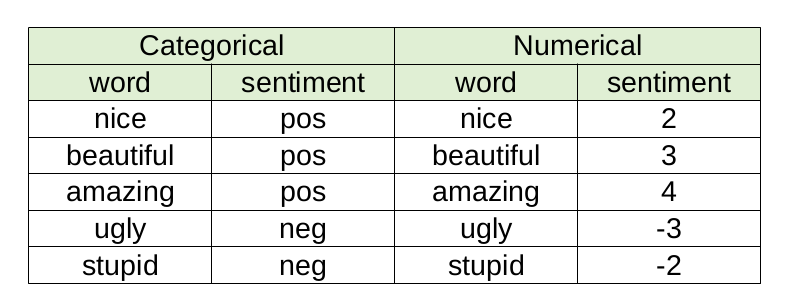

Lexicon-based methods make use of a collection of words, each of which are assigned a polarity score, to decide the general sentiment score of a given text. This method is more accessible as it does not require the training of a model to be able to classify sentiment. However, the fact that sentiment is calculated based on the polarity score of each word in the text can lead to errors in sentiment classification. Such errors may arise due to a lack of understanding of various language traits such as sarcasm or even variations in the use of word the same word. Take, for example, the following phrases: "He killed many people" and "I killed it in that exam". In the second phrase the word killied is not used in a negative context. 

Let's start by importing all the libraries needed for this tutorial.

In [1]:
# ___Cell no. 1___

import pandas as pd
import csv
import re
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

We now read in our Twitter data that has been partially cleaned (as demonstrated in Tutorial 1) and put it into a pandas dataframe.

In [2]:
# ___Cell no. 2___

# Read in the data and put it into a dataframe
df = pd.read_csv("labelled_data_cleaned.csv")

# Have a quick look at the dataframe
df

,tweet_text,label
0,Jesus Ive actually spent all the money I saved...,1
1,Coronavirus and throat cancer looking after yo...,1
2,Me sick at home in Houston w Covid symptoms ri...,1
3,Coronavirus pandemic prompts record drop in gl...,1
4,Coronavirus How can we make postpandemic citie...,1
...,...,...
4224,Was recently tested for #coronavirus not at al...,1
4225,"Despite the Lockdown, Crises, Vera Lynn We'll ...",1
4226,"Due to COVID and mandatory face masks, million...",0
4227,Something someone said to me in regards to me ...,0


The 'label' column consists of sentiment lables which have been assigned to each tweet by a human, i.e. this is a **'labelled'** dataset. A label of either 0, 1 or 2, corresponds to an assigned negative, neautral or positive sentiment, respectively.

<hr>

## 1. Sentiment Analysis with TextBlob

The functions below will use TextBlob in order to determine the **Polarity** and **Subjectivity** of each tweet. Polarity is denoted by a score between -1 and 1, with scores < 0, scores = 0 and scores > 0 corresponding to negative, neutral and positive sentiment, respectively. Subjectivity is denoted by a score between 0 and 1 and is a score of whether the statement is deemed as more fact, or opinion based.

Before making use of the sentiment property of TextBlob, it's good practice to know what's going on behind the scenes. As mentioned previously, TextBlob is a lexicon based method. For a large library of words, researchers have assigned a respective polarity and subjectivity score. For a given text, TextBlob then finds all words and phrases from a given text that it can assign both a polarity and subjectivity to, and averages them to produce the final output.

TextBlob's sentiment analysis is also rule-based, it applies various actions to existing polarity and subjectivity scores according to a set of pre-defined rules. For example, the word 'good' has a polarity score of 0.7, but if the word 'not' appears in front of it, then in order to determine the polarity of the phrase 'not good', the polarity of 'good' is multipled by -0.5, yielding a score of -0.35. Punctuation, especially exclamation points, also increase the positive or negative intensity of the polarity score.

In [3]:
# ___Cell no. 3___

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

Let's try out these TextBlob tools by entering any text you'd like - try different examples, i.e. text which you think has positive or negative sentiment and see if TextBlob can get it right! Does punctuation make a difference? How does it handle sarcasm or common text slang such as 'lol'?

In [10]:
# ___Cell no. 4___

your_text = 'this is unexpected?'
getPolarity(your_text), getSubjectivity(your_text)

(0.1, 1.0)

We now have subjectivity and polarity scores for each of our tweets, which we add to our dataframe.

In [11]:
# ___Cell no. 5___

df['subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['polarity'] = df['tweet_text'].apply(getPolarity)

df

,tweet_text,label,subjectivity,polarity
0,Jesus Ive actually spent all the money I saved...,1,0.083333,-0.050000
1,Coronavirus and throat cancer looking after yo...,1,0.200000,-0.100000
2,Me sick at home in Houston w Covid symptoms ri...,1,0.696429,-0.214286
3,Coronavirus pandemic prompts record drop in gl...,1,0.000000,0.000000
4,Coronavirus How can we make postpandemic citie...,1,0.125000,0.000000
...,...,...,...,...
4224,Was recently tested for #coronavirus not at al...,1,0.643333,0.221667
4225,"Despite the Lockdown, Crises, Vera Lynn We'll ...",1,0.000000,0.000000
4226,"Due to COVID and mandatory face masks, million...",0,0.555000,-0.038333
4227,Something someone said to me in regards to me ...,0,0.644444,0.008333


Next, let's create a function to add a sentiment label to each tweet, based on it's polarity score.

In [12]:
# ___Cell no. 6___

# Create a function to label postitive, neutral and negative tweets

def get_sentiment_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'    

In [13]:
# ___Cell no. 7___

# Apply the get_sentiment_label function to the polarity column
# and add the sentiment results as a new column in our dataframe

df['TBsentiment'] = df['polarity'].apply(get_sentiment_label)
df

,tweet_text,label,subjectivity,polarity,TBsentiment
0,Jesus Ive actually spent all the money I saved...,1,0.083333,-0.050000,Negative
1,Coronavirus and throat cancer looking after yo...,1,0.200000,-0.100000,Negative
2,Me sick at home in Houston w Covid symptoms ri...,1,0.696429,-0.214286,Negative
3,Coronavirus pandemic prompts record drop in gl...,1,0.000000,0.000000,Neutral
4,Coronavirus How can we make postpandemic citie...,1,0.125000,0.000000,Neutral
...,...,...,...,...,...
4224,Was recently tested for #coronavirus not at al...,1,0.643333,0.221667,Positive
4225,"Despite the Lockdown, Crises, Vera Lynn We'll ...",1,0.000000,0.000000,Neutral
4226,"Due to COVID and mandatory face masks, million...",0,0.555000,-0.038333,Negative
4227,Something someone said to me in regards to me ...,0,0.644444,0.008333,Positive


We can have a quick look at the sentiment distribution of the tweets as follows:

In [14]:
# ___Cell no. 8___

df['TBsentiment'].value_counts()

Positive    1888
Neutral     1394
Negative     947
Name: TBsentiment, dtype: int64

Interestingly, we see that according to TextBlob, there are more tweets with a positive sentiment than either neutral or negative. Is this what you would expect? 

Let's have a closer look at the tweets which TexBlob has classified as the most positive and most negative, to check the accuracy of the assigned sentiment. To do this, we will first sort all the tweets by polarity in descending order, i.e. from the most positive tweets to the most negative.

In [15]:
# ___Cell no. 9___

#We sort the tweets by their polarity value and put the sorted tweets into a new dataframe 

sorted_df = df.sort_values(by=['polarity'], ascending=False)

Now, let's print out the top 15 most _positive_ tweets, which are now the first 15 tweets in the new dataframe. Do these tweets have a positive sentiment?

In [16]:
# ___Cell no. 10___

#Print out the text from the first 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df.head(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 Ripley said it best... #COVID19  

2 Elect a clown, get a circus!! #DumpTrump #DumpTrump2020 #pandemic #coronavirus #COVID19 #JustWearADamnMask #MasksSaveLives #ElectAClown #GetACircus #VoteBlueToSaveAmerica2020 #VoteBlue #VoteBlueNoMatterWho #BLM #BlackLivesMatter #MorningJoe #maddow #MtRushmore  

3 I Just earned the Best Practices for Working from Home badge on and you should too!  

4 Best Story of a wedding in Lockdown Marriage during Covid19 Pakista... via  

5 Perfect lockdown entertainmentBjrk orchestral concert seriesLet's hope we hear some gems like this#sixglassesofwater#sevenphonecalls #itsnotuptoyou 

6 The best part about living in Lemon Grove during this pandemic is you dont hear anybody say, Lets go to Dirks NiteClub 

7 damnn i didnt know #covid effed up #legendary filminggg 

8 lockdown or not, Carrey is just awesome  

9 Perfect Pandemic event.  

10 Coronavirus Keeping Wembley pitch perfect during lockdown  

11 best #COVID19 mask  

12 Well done you and had the b

Next, let's print out the top 15 most _negative_ tweets, which are now the last 15 tweets in the new dataframe. Do these tweets have a negative sentiment?

In [17]:
# ___Cell no. 11___

#Print out the text from the last 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df.tail(15)['tweet_text']):
    print(i+1, tweet, '\n')

1 America has some of the worst coronavirus cases and numbers in the world. TikTok people  

2 Trump blames China again and reiterates that Brazil lives in terrible situation with covid19 

3 Trump blames China again and reiterates that Brazil lives in terrible situation with covid19 

4 Lockdown speeds are damn insane  

5 #Kenya's #COVID19 Update, #Nairobi and #Mombasa Worst Hit  

6 Poindexter Poilievre has asked the RCMP to charge PM Trudeau with failing to screw up Covid aiding families in need conspiracy to assist students stealing spotlight from Scheer refusing to wear boring socks wearing face mask in publicInvestigation continues.  

7 Inundated Houston hospitals issue grim advisory to ambulances Go elsewhere  

8 I feel like lockdown has made me boring  

9 Kansas sees worst COVID19 spike since pandemic began  

10 Grim news #pandemic #Covid19  

11 Awful news...Coronavirus 70 Media Wales journalists 'at risk of redundancy'  

12 Poindexter Poilievre has asked the RCMP to cha

Now let's visualise distribution of the polarity and subjectivity assignments from TextBlob. To do this, we will make use of interactive plots from [Plotly](https://plotly.com/python/).

Interactive Plotly plots make use of JavaScript behind the scenes. To connect our Jupyter notebook with JavaScript, we need to execute the following line of code:

In [18]:
# ___Cell no. 12___

init_notebook_mode(connected=True)

Below, we use [Plotly Express](https://plotly.com/python/plotly-express/) to create a simple scatter plot of the polarity and subjectivity data. As this is an interactive plot, you will be able to hover your mouse over a point to view it's properties. 

Note how plotly express automatically labels our axes for us according to our dataframe column names.

In [20]:
# ___Cell no. 13___

fig = px.scatter(df, x="polarity", y="subjectivity", hover_data=['tweet_text'],
                 title="TextBlob Sentiment Analysis")

fig.show()

What can we learn from this scatter plot? Discuss this with your team.

<hr>

## 2. Sentiment Analysis with VADER

Let's now try performing a sentiment analysis using the [VADER](https://pypi.org/project/vaderSentiment/) (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which, like TextBlob, uses a lexicon and rule-based method to assign sentiment scores. The VADER SentimentIntensityAnalyzer tool is specifically attuned to sentiments expressed in social media. Performing sentiment analysis on social media posts is challenging as you are often dealing with short snippets of text, as well as slang and abbreviated language. These challenges were given special consideration during the development of VADER's sentiment analyser. As mentioned previously, lexicons consist of a large library of words which are classed as negative, neutral or positive. In addition, the VADER lexicon also includes acronyms (lol, btw etc.) and slang (meh, nah etc.).

Just like the TextBlob method, VADER also applies grammatical rules which affect the sentiment of the text. However, the rules applied by the VADER sentiment analyser are more sophisticated. VADER is sensitive to both the polarity (whether the sentiment is positive or negative), as well as the intensity (how positive or negative is sentiment) of emotions in the text.

- Capiltalisation increases the positive or negative intensity of the sentiment score, i.e. the text "I am very happy today" will have a different sentiment score to "I am VERY happy today".
- The word "but" signifies a shift in sentiment of the text, with the sentiment score then dominated by the second part of the sentence.
- Certain "booster words" also either increase or decrease the intensity of the sentiment. For example, the word "extremely", i.e. "The food is extremely good” is more intense than "The food is good".
- The VADER model also catches nearly 90% of cases where negation flips the sentiment of the text. For example, a negated sentence would be "The food isn’t really all that great".

For a given text, VADER outputs a scores for the negative, neutral and positive sentiment categories, as well as a compound score, which is a “normalized, weighted, composite" score and is a good overall indication of the assigned sentiment.

To make the VADER sentiment analyser easier and quicker to use, let's call it _analyser_.

In [ ]:
# ___Cell no. 14___

analyser = SentimentIntensityAnalyzer()

As we did with TextBlob, let's now try out the vaderSentiment tool by entering any text you'd like - try different examples, i.e. text which you think has positive or negative sentiment and see if VADER can get it right! Experiment with punctuation and capilaisation. How does it handle sarcasm, slang or abbreviations?

In [ ]:
# ___Cell no. 15___

your_text = 'wow this is so cool'
analyser.polarity_scores(your_text)

Let us now use VADER to retrieve the compound sentiment score for all tweets and add this information to our original (unsorted) dataframe.

In [ ]:
# ___Cell no. 16___

#Create a function to get the polarity

def get_vaderCompoundPolarity(text):
    return analyser.polarity_scores(text)['compound']
    
df['vader_compound'] = df['tweet_text'].apply(get_vaderCompoundPolarity)
df

Let us once again apply the 'get_sentiment_label' function to assign the VADER sentiment of each tweet given the compound score.

In [ ]:
# ___Cell no. 17___

# Apply the get_sentiment_label function to the VADER compound score
# and add the VADER sentiment results as a new column in our dataframe

df['VADERsentiment'] = df['vader_compound'].apply(get_sentiment_label)
df

Now let's have a look at what VADER has classified as the 15 most postive and negative tweets by using the same method shown in the TextBlob example. How does the accuracy of the assigned sentiments compare to those from the 15 most postitive and negative tweets from TextBlob?

In [ ]:
# ___Cell no. 18___

#We sort the tweets by their vader_compound value and put the sorted tweets into a new dataframe 

sorted_df2 = df.sort_values(by=['vader_compound'], ascending=False)

In [ ]:
# ___Cell no. 19___

#Print out the text from the first 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df2.head(15)['tweet_text']):
    print(i+1, tweet, '\n')

In [ ]:
# ___Cell no. 20___

#Print out the text from the last 15 tweets in the sorted dataframe

for i, tweet in enumerate(sorted_df2.tail(15)['tweet_text']):
    print(i+1, tweet, '\n')

Lastly let us compare the sentiment assignments of TextBlob and VADER by plotting another Plotly interactive scatter plot. What can we learn from this plot? Discuss this with your team.

In [ ]:
# ___Cell no. 21___

fig = px.scatter(df, x="polarity", y="vader_compound", hover_data=['tweet_text'],
                 title="TextBlob vs VADER")
fig.show()

**Additional challenge**: Given the labels provided for each tweet in the 'label' column (which we will consider to be the correct sentiment of each tweet), investigate the accuracy of the TextBlob and VADER sentiment analysis tools.

1) For what percentage of tweets did the TextBlob and VADER tools correctly predict the sentiment? Which model performs better?\
2) For the each of the models, does the number of words (or characters) in a tweet affect the accuracy of the assigned sentiment?

NB: This challenge is not compulsory. However, if your team does attempt to answer either question, or both, you may tell us about your findings during your team presentation.

After completing this tutorial you should be able to:

- Use the TextBlob library to perform basic sentiment analysis
- Use the VADER library to perform basic sentiment analysis
- Produce interactive plots using Plotly

### Tutorial 2 complete! Well done! 